# 04. 나이 구간별 점수 분석

### 데이터 로딩 및 필터링

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path("../data/processed/cleaned_student_scores.csv")

df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=['정제된_나이', '정제된_점수']).copy()
df.shape

(106, 10)

### 나이 구간 생성

`pd.cut()`을 활용하여 연속형 나이를 구간형 변수로 나눈다.

→ 새로운 컬럼: `나이구간`

In [11]:
bins = [10, 15, 20, 25, 30, 100]
labels = ['10대 중반 이하','10대 후반', '20대 초반', '20대 후반', '30대 이상']

df['나이구간'] = pd.cut(df['정제된_나이'], bins=bins, labels=labels, right=False)
df['나이구간'].value_counts().sort_index()

나이구간
10대 중반 이하    10
10대 후반       41
20대 초반       44
20대 후반        7
30대 이상        4
Name: count, dtype: int64

### 구간별 평균 점수 계산


In [12]:
grouped = df.groupby('나이구간')['정제된_점수'].agg(['count', 'mean', 'std']).round(2)
grouped

C:\Users\sbeep\AppData\Local\Temp\ipykernel_23472\402948871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('나이구간')['정제된_점수'].agg(['count', 'mean', 'std']).round(2)


,count,mean,std
나이구간,,,
10대 중반 이하,10,75.40,12.24
10대 후반,41,80.56,14.35
20대 초반,44,73.39,15.67
20대 후반,7,80.29,12.71
30대 이상,4,72.75,15.71


### 평균 점수 막대 그래프

C:\Users\sbeep\AppData\Local\Temp\ipykernel_23472\888346118.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\sbeep\AppData\Local\Temp\ipykernel_23472\888346118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


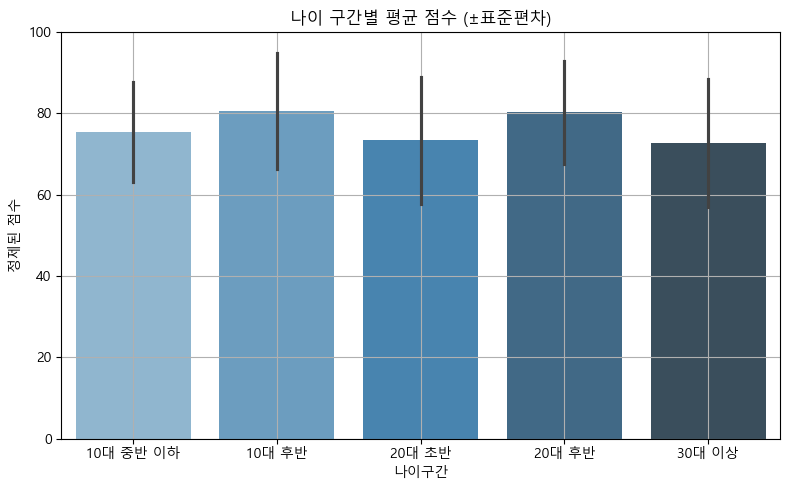

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(8, 5))
sns.barplot(
    x='나이구간',
    y='정제된_점수',
    data=df,
    ci='sd',
    palette='Blues_d'
)
plt.title('나이 구간별 평균 점수 (±표준편차)')
plt.xlabel('나이구간')
plt.ylabel('정제된 점수')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

### 박스플롯으로 분포 확인

C:\Users\sbeep\AppData\Local\Temp\ipykernel_23472\3504261980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


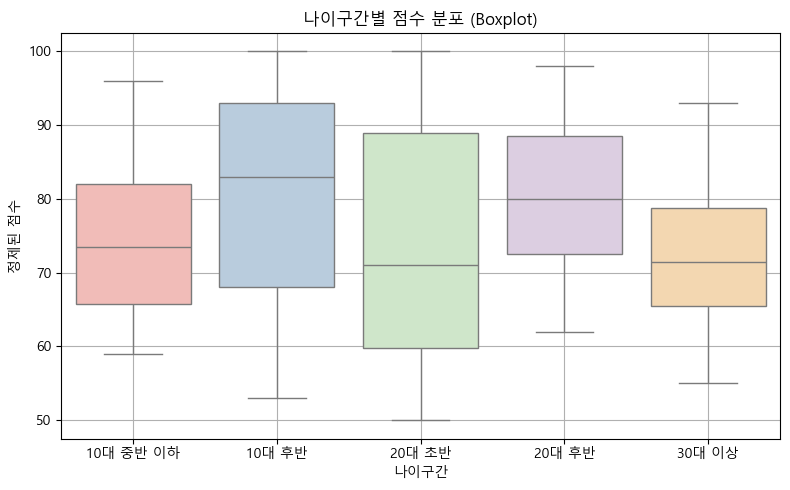

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='나이구간',
    y='정제된_점수',
    data=df,
    palette='Pastel1'
)
plt.title('나이구간별 점수 분포 (Boxplot)')
plt.xlabel('나이구간')
plt.ylabel('정제된 점수')
plt.grid(True)
plt.tight_layout()
plt.show()

### 결과 해석

1. 전체적인 평균 점수 수준
   * 평균 점수가 가장 높은 연령 구간은 **10대 후반 (80.56점)**, 그 다음은 **20대 후반 (80.29점)** 이다.
   * 가장 낮은 구간은 **30대 이상 (72.75점)**으로, 전체 평균에서 다소 낮은 편이다.
2. 표준편차 및 데이터 수 주의
   * 표준편차는 전반적으로 **12~15점 수준**이며, 20대 초반이 **15.67점**으로 가장 크다.
   **→ 그룹 내 편차 큼**
   * **30대 이상은 표본 수가 4명**에 불과하여 평균 해석에 주의가 필요하다.
3. Boxplot 기반 분포 해석
   * **10대 후반, 20대 후반은 상대적으로 고득점차(90점 이상)** 가 많고, **하위 점수도 분산이 덜함**
   * **20대 초반은 분포 폭이 넓고, 중아값도 낮음** → 그룹 내 성취도 차이가 큼
   * **30대 이상은 중앙값이 낮고 하위 점수도 존재** → 전반적인 성과가 낮을 가능성
4. 최종 결론
   * 나이 구간에 따라 평균 점수에 **차이가 존재하며**, 특히**10대 후반과 20대 후반은 비교적 높은 성과를 보임**
   * **20대 초반은 분포가 넓어 이질적인 하위 집단이 포함된 가능성**이 있음
   * **샘플 수가 적은 30대 이상, 20대 후반 구간은 신중히 해석해야 함**